## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [21]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [22]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [23]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [24]:
import pandas as pd
arrange_data = []
for i in data:
    arrange_data.append(i.split('\t'))
    
df = pd.DataFrame(arrange_data)
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

first_link: http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
response: <Response [200]>
img: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x435 at 0x1C9260B4518>


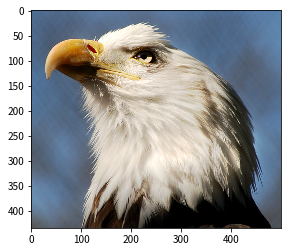

In [30]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0][1]
print('first_link:',first_link)
response = requests.get(first_link)
print('response:',response)
img = Image.open(BytesIO(response.content))
print('img:',img)
# Convert img to numpy array

plt.imshow(img)
plt.show()

In [37]:
def img2arr_fromURLs(url_list, resize = False):
    """
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list=[]
    try:
        for i in url_list:
            print(i)
            response = requests.get(i)
            print('response',response)
            img = Image.open(BytesIO(response.content))
            print('response',img)
            img_list.append(img)
    except:
        print('失效連結:',i)
    print(img_list)
    return img_list

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
response <Response [200]>
response <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x435 at 0x1C9276C1FD0>
http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
response <Response [200]>
response <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x322 at 0x1C9276B9898>
http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
response <Response [200]>
response <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500 at 0x1C928866940>
http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
response <Response [200]>
response <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x1C9277243C8>
http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
response <Response [404]>
失效連結: http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x435 at 0x1C9276C1FD0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x322 

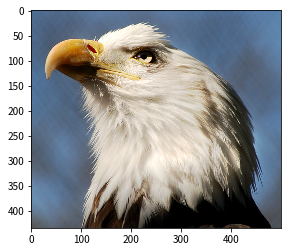

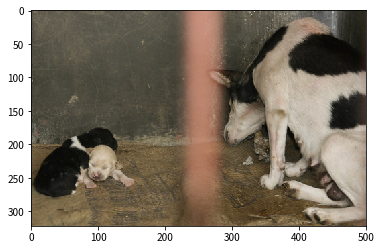

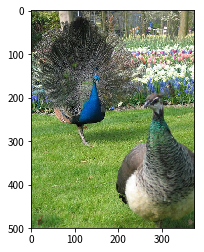

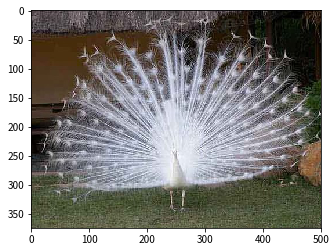

In [38]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()